# Pre-Processing Data to make to ready for analysis

In [1]:
import numpy as np
import pandas as pd
import os , sys , glob
import sklearn

In [2]:
# The environmet variable should be set at a system level rather than in code. Setting it now, as python is not picking it up.
# HAVE A CONFIGURATION FILE TO PICK UP THESE VALUES. WE DO CONFIGURATION FILES GET STORED. 
# ARE JUPYTER NOTEBOOKS DEPLOYED IN PRODUCTION OR CONVERTED TO PYTHON COMPILD FILES
# CONFIGURE ENVIRONMENT VARIABLES IN PCF CONTAINER. (PAT W)

os.environ['PROJECT_DIR'] = "C:\\Users\\581686284\\PycharmProjects\\Automated_Ticket_Management-2\\"

# Getting the list of file in the directory

apps_files = glob.glob(os.environ['PROJECT_DIR'] +  "rawdata\\sm9\\apps\\*.csv")
windows_files = glob.glob(os.environ['PROJECT_DIR'] +  "rawdata\\sm9\\windows\\*.csv")

In [3]:
#%%timeit

# Reading all apps files .
# Using concat takes 1.78 s ± 39.3 ms per loop , compared to append which takes 2.92 s ± 55.2 ms per loop. Hence, using concat
sm9_columns = ['Number','Assigned Dept','Assigned to','RBC Line Item Title','RBCMMPRITM','Rbc Description','Submit Date','Close Date']
apps_df = [ pd.read_csv(app_file , encoding='latin-1' , usecols=sm9_columns ) for app_file in apps_files ]
#print(type(apps_df))
apps_data = pd.concat(apps_df)
apps_data.head()
# (128080, 8)


,Number,Rbc Description,Assigned to,Submit Date,RBCMMPRITM,Assigned Dept,Close Date,RBC Line Item Title
0,Q01654864-001,A termination request has recently been submit...,535506877,2005/01/17 6:51,NaN,EAA_APPLICATION SERVICES_IMPL,2004/02/18 11:47,A termination request has recently been submit...
1,Q01655290-001,A termination request has recently been submit...,310294822,2005/01/17 7:45,NaN,EAA_APPLICATION SERVICES_IMPL,2004/02/18 13:54,A termination request has recently been submit...
2,Q02211785-001,04/14 - RBCIS term Frédéric ERBETTI - 52333504...,631444387,01/26/18 08:00:22,NaN,EAA_APPLICATION SERVICES_IMPL,04/16/18 10:37:01,04/14 - RBCIS term Frédéric ERBETTI - 523335040
3,Q02244759-001,RBCIS - BEDFORD - EXIT Arnaud COURTOIS April ...,180190019,2002/09/18 9:32,NaN,EAA_APPLICATION SERVICES_IMPL,04/17/18 09:58:56,04/15 PD RBCIS - BEDFORD - EXIT Arnaud COURTO...
4,Q02264742-001,ESAM HR TERMINATION - SM9\r\nSUBMITTER LOGON I...,324653500,02/16/18 21:15:44,NaN,EAA_APPLICATION SERVICES_IMPL,2004/02/18 19:37,ESAM HR TERMINATION - SM9


In [4]:
#dict(apps_data['Assigned Dept'].value_counts())
# EAA_APPLICATION SERVICES_IMPL : 106136
# Others : 21944

#len(apps_data.loc[apps_data['Assigned Dept'] != 'EAA_APPLICATION SERVICES_IMPL'])
#len(apps_data)

# Cleaning Data 

1. We want to consider only Applications & Windows tickets.
2. We don't want to consider tickets where ticket has not been assigned to an analyst ( nan, Internal ). 
3. We want to remove columns that have only NaN values. Hence, we have specified the columns we want when reading csv. 

# Cleaning Apps Data from SM9

In [5]:
apps_data = apps_data.loc[apps_data['Assigned Dept'] == 'EAA_APPLICATION SERVICES_IMPL']

# Remove those tickets that don't have Analyst linked to it. Noise. 
apps_data = apps_data[pd.notnull(apps_data['Assigned to'])]
#apps_data[['Rbc Description','RBC Line Item Title']]
apps_data.head()

,Number,Rbc Description,Assigned to,Submit Date,RBCMMPRITM,Assigned Dept,Close Date,RBC Line Item Title
0,Q01654864-001,A termination request has recently been submit...,535506877,2005/01/17 6:51,NaN,EAA_APPLICATION SERVICES_IMPL,2004/02/18 11:47,A termination request has recently been submit...
1,Q01655290-001,A termination request has recently been submit...,310294822,2005/01/17 7:45,NaN,EAA_APPLICATION SERVICES_IMPL,2004/02/18 13:54,A termination request has recently been submit...
2,Q02211785-001,04/14 - RBCIS term Frédéric ERBETTI - 52333504...,631444387,01/26/18 08:00:22,NaN,EAA_APPLICATION SERVICES_IMPL,04/16/18 10:37:01,04/14 - RBCIS term Frédéric ERBETTI - 523335040
3,Q02244759-001,RBCIS - BEDFORD - EXIT Arnaud COURTOIS April ...,180190019,2002/09/18 9:32,NaN,EAA_APPLICATION SERVICES_IMPL,04/17/18 09:58:56,04/15 PD RBCIS - BEDFORD - EXIT Arnaud COURTO...
4,Q02264742-001,ESAM HR TERMINATION - SM9\r\nSUBMITTER LOGON I...,324653500,02/16/18 21:15:44,NaN,EAA_APPLICATION SERVICES_IMPL,2004/02/18 19:37,ESAM HR TERMINATION - SM9


# Cleaning Windows Data from SM9

In [6]:
#%%timeit

# Using concat takes 5.39 s ± 340 ms per loop , compared to append which takes 6.69 s ± 375 ms per loop. Hence, using concat

windows_df = [ pd.read_csv(windows_file , encoding='latin-1' , usecols=sm9_columns) for windows_file in windows_files ]
windows_data = pd.concat(windows_df)
windows_data.head()


,Number,Rbc Description,Assigned to,Submit Date,RBCMMPRITM,Assigned Dept,Close Date,RBC Line Item Title
0,Q01370983-001,An access review has recently been completed b...,NaN,11/29/16 05:44:47,NaN,EAA_WINDOWS SERVICES_IMPL,04/21/17 03:10:36,An access review has recently been completed b...
1,Q01482939-001,Apr 2 - RBCIS - BEDFORD - termination - Franck...,956519110,2002/01/17 6:52,NaN,EAA_WINDOWS SERVICES_IMPL,2004/03/17 7:38,04/02 - PD - RBCIS - BEDFORD - termination - F...
2,Q01497296-001,An access review has recently been completed b...,NaN,2002/07/17 22:12,NaN,EAA_WINDOWS SERVICES_IMPL,04/26/17 03:07:50,An access review has recently been completed b...
3,Q01504697-001,An access review has recently been completed b...,NaN,2002/11/17 0:01,NaN,EAA_WINDOWS SERVICES_IMPL,04/26/17 03:07:55,An access review has recently been completed b...
4,Q01510173-001,An access review has recently been completed b...,NaN,02/14/17 22:08:31,NaN,EAA_WINDOWS SERVICES_IMPL,04/26/17 03:08:00,An access review has recently been completed b...


In [10]:
windows_data['Assigned Dept'].value_counts()

# EAA_APPLICATION SERVICES_IMPL : 106136
# Others : 21944
# EAA_WINDOWS SERVICES_IMPL : 179222
# Others : 17204

# Applications : 106136
# Windows : 179222
# total others : 39148

len(windows_data.loc[windows_data['Assigned Dept'] != 'EAA_WINDOWS SERVICES_IMPL'])

17204

In [143]:
import matplotlib
#import Image
import matplotlib.pyplot as plt
font = {'family' : 'arial',
        'weight' : 'bold',
        'size'   : 15}

matplotlib.rc('font', **font)
tickets_across_bins = [106136, 179222 , 39148 ]
bins = ['Application', 'Windows' , 'Others']
colors = ['gold', 'silver', 'goldenrod']
plt.pie(tickets_across_bins, labels=bins, colors=colors, startangle=90, autopct='%.1f%%', )
#plt.show()
plt.savefig('../docs/tickets_across_bins.jpg')
#Image.open('../docs/tickets_across_bins.png').save('../docs/tickets_across_bins.jpg','JPEG')

In [37]:
windows_data = windows_data.loc[windows_data['Assigned Dept'] == 'EAA_WINDOWS SERVICES_IMPL']

# Remove those tickets that don't have Analyst linked to it. Noise. 
windows_data = windows_data[pd.notnull(windows_data['Assigned to'])]
windows_data.shape

(128969, 8)

# Tickets that belong to Windows or Application Services bins & have been assigned to an analyst 

In [38]:
#%timeit
sm9_data = pd.concat([apps_data , windows_data])
sm9_data.to_csv(path_or_buf= os.environ['PROJECT_DIR'] + "\\datasets\\sm9.csv" , encoding="Latin-1" , index = False)
sm9_data.head()
#(233575, 8)

## NOTE : WHEN YOU LOAD SM9_DATA FROM CSV YOU NEED TO CONVERT THE ASSIGNED TO COLUMN TO INTEGER INSTEAD OF FLOAT. 

,Number,Rbc Description,Assigned to,Submit Date,RBCMMPRITM,Assigned Dept,Close Date,RBC Line Item Title
0,Q01654864-001,A termination request has recently been submit...,535506877,2005/01/17 6:51,NaN,EAA_APPLICATION SERVICES_IMPL,2004/02/18 11:47,A termination request has recently been submit...
1,Q01655290-001,A termination request has recently been submit...,310294822,2005/01/17 7:45,NaN,EAA_APPLICATION SERVICES_IMPL,2004/02/18 13:54,A termination request has recently been submit...
2,Q02211785-001,04/14 - RBCIS term Frédéric ERBETTI - 52333504...,631444387,01/26/18 08:00:22,NaN,EAA_APPLICATION SERVICES_IMPL,04/16/18 10:37:01,04/14 - RBCIS term Frédéric ERBETTI - 523335040
3,Q02244759-001,RBCIS - BEDFORD - EXIT Arnaud COURTOIS April ...,180190019,2002/09/18 9:32,NaN,EAA_APPLICATION SERVICES_IMPL,04/17/18 09:58:56,04/15 PD RBCIS - BEDFORD - EXIT Arnaud COURTO...
4,Q02264742-001,ESAM HR TERMINATION - SM9\r\nSUBMITTER LOGON I...,324653500,02/16/18 21:15:44,NaN,EAA_APPLICATION SERVICES_IMPL,2004/02/18 19:37,ESAM HR TERMINATION - SM9


In [39]:
sm9_data.rename(columns={"Assigned Dept" : "Assigned_Dept" , "Assigned to" : "Assigned_To" , "RBC Line Item Title" : "RBC_Line_Item_Title" ,'RBCMMPRITM' : 'RITM_Number' , 'Rbc Description' : 'RBC_Description' } , inplace= True)

sm9_data_without_RITM = sm9_data.loc[sm9_data['RITM_Number'].isnull()]
#33461
sm9_data_with_RITM = sm9_data.loc[~sm9_data['RITM_Number'].isnull()]
#200114

In [40]:
print(len(sm9_data_without_RITM))
print(len(sm9_data_with_RITM))

33461
200114


In [41]:
sm9_data_with_RITM.head()

,Number,RBC_Description,Assigned_To,Submit Date,RITM_Number,Assigned_Dept,Close Date,RBC_Line_Item_Title
5,Q02285154-001,Bulk Request - Generic Bulk\r\n\r\nTHE REQUEST...,191458827,02/27/18 16:25:01,RITM1758877,EAA_APPLICATION SERVICES_IMPL,04/23/18 17:38:20,Cards & Payments Audit Bulk Request - Generic ...
12,Q02268854-002,PLEASE REMOVE THE FOLLOWING ACCESS\r\n\r\nUser...,310294822,2003/07/18 13:17,RITM1732565,EAA_APPLICATION SERVICES_IMPL,04/13/18 13:36:03,* 03/13 PO - RTP -AACG REMOVAL FICC RTTM
13,Q02303786-002,"Hi Team,\r\n\r\nPlease amend the below access ...",310294822,2003/07/18 11:25,RITM1789456,EAA_APPLICATION SERVICES_IMPL,2004/03/18 11:31,03/13 PO - RTP AACG - Application Access Reque...
15,Q02321589-002,CMACS-12530 - Q02321589-001 - SWIFT Messaging ...,310294822,03/15/18 07:44:33,RITM1815225,EAA_APPLICATION SERVICES_IMPL,2004/03/18 14:37,04/03 PO - RTP - AACG - SWIFT Messaging Platfo...
16,Q02315810-001,IA Code/Branch Access - Add - BTS\r\nTHE REQUE...,328453238,2003/12/18 11:03,RITM1805571,EAA_APPLICATION SERVICES_IMPL,2004/02/18 13:16,PD 03/30 REVOKE ACCESS - IA Code/Branch Access...


# Cleaning Service Now Data

We're only concerned with tickets that have been assigned to analyst. Based on inputs from domain experts 

In [42]:
sn_files = glob.glob(os.environ['PROJECT_DIR'] +  "rawdata\\sn\\*.csv")
#sn_files
sn_df = [pd.read_csv(sn_file , encoding='latin-1') for sn_file in sn_files]
sn_data = pd.concat(sn_df)
sn_data.head()


,number,opened_at,state,closed_at,u_interaction_id,cat_item,u_assignment_group
0,RITM0507150,2017/01/01 11:02,Pending,NaN,NaN,Modify Distribution List - Restrictions,EAA_WINDOWS SERVICES_IMPL
1,RITM0507208,2017/01/02 4:47,Closed Complete,2017/01/03 12:34,NaN,Existing Network Folder/Shared Drive  Add/Remove,EAA_WINDOWS SERVICES_IMPL
2,RITM0507222,2017/01/02 5:12,Closed Complete,2017/01/02 7:05,NaN,Add User to Group,EAA_WINDOWS SERVICES_IMPL
3,RITM0507228,2017/01/02 5:51,Closed Complete,2017/01/04 11:57,SD09972560,Service Manager 9 - User Access,EAA_APPLICATION SERVICES_IMPL
4,RITM0507231,2017/01/02 6:00,Closed Complete,2017/01/04 17:34,SD09972577,Add User to Group,EAA_WINDOWS SERVICES_IMPL


In [43]:
sn_data['u_assignment_group'].value_counts()
# EAA_WINDOWS SERVICES_IMPL        342209
# EAA_APPLICATION SERVICES_IMPL     57791


EAA_WINDOWS SERVICES_IMPL        342209
EAA_APPLICATION SERVICES_IMPL     57791
Name: u_assignment_group, dtype: int64

In [44]:
#Filter Service Now data to contain only Windows & Application Services ticket

# Safer to do the below check , as we don't know whether we'll receive data from various bins going forward. 
sn_win_app_data = sn_data.loc[sn_data['u_assignment_group'].isin(['EAA_WINDOWS SERVICES_IMPL' , 'EAA_APPLICATION SERVICES_IMPL'])]
#sn_win_app_data['u_assignment_group'].unique().tolist()

sn_win_app_data.rename(inplace = True , columns={'number' : 'RITM_Number' , 'u_assignment_group' : 'Assigned_Dept'})

In [45]:
sn_win_app_data['state'].value_counts()

Closed Complete      365186
Closed Incomplete     29384
Pending                4804
Work in Progress        606
Open                     19
Closed Skipped            1
Name: state, dtype: int64

In [46]:
merged_data = pd.merge(sn_win_app_data ,sm9_data_with_RITM, on='RITM_Number', how='outer', indicator=True)
#len(merged_data)
#256328
#merged_data.head()

# merged_data.loc[merged_data['RITM_Number'].isnull()]
# 33461

In [47]:
merged_data.head()

,RITM_Number,opened_at,state,closed_at,u_interaction_id,cat_item,Assigned_Dept_x,Number,RBC_Description,Assigned_To,Submit Date,Assigned_Dept_y,Close Date,RBC_Line_Item_Title,_merge
0,RITM0507150,2017/01/01 11:02,Pending,NaN,NaN,Modify Distribution List - Restrictions,EAA_WINDOWS SERVICES_IMPL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,RITM0507208,2017/01/02 4:47,Closed Complete,2017/01/03 12:34,NaN,Existing Network Folder/Shared Drive  Add/Remove,EAA_WINDOWS SERVICES_IMPL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,RITM0507222,2017/01/02 5:12,Closed Complete,2017/01/02 7:05,NaN,Add User to Group,EAA_WINDOWS SERVICES_IMPL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,RITM0507228,2017/01/02 5:51,Closed Complete,2017/01/04 11:57,SD09972560,Service Manager 9 - User Access,EAA_APPLICATION SERVICES_IMPL,Q01423637-001,Add - Service Manager 9 - User Access\r\n\r\nT...,195808886,2001/02/17 7:05,EAA_APPLICATION SERVICES_IMPL,2001/04/17 11:37,Add - Service Manager 9 - User Access,both
4,RITM0507231,2017/01/02 6:00,Closed Complete,2017/01/04 17:34,SD09972577,Add User to Group,EAA_WINDOWS SERVICES_IMPL,Q01423652-001,Modify User - Add User to Group\r\nTHE REQUEST...,190899732,2001/02/17 7:10,EAA_WINDOWS SERVICES_IMPL,2001/04/17 17:18,* ESC - Jan 4 - SEe updates - Modify User - A...,both


In [48]:
# For the merged dataset, tickets that have Assigned_To as null , are auto-resolved. Hence, we don't need to consider them for 
# recommendation

merged_data_assigned_tickets = merged_data.loc[~merged_data['Assigned_To'].isnull()]

In [49]:
merged_data_assigned_tickets['Assigned_Dept_x'].value_counts()

EAA_WINDOWS SERVICES_IMPL        113857
EAA_APPLICATION SERVICES_IMPL     72202
Name: Assigned_Dept_x, dtype: int64

In [50]:
#merged_data_assigned_tickets['RITM_Number'].value_counts()

# Get all tickets that have cat_item / line item as null. These would be tickets present in SM9 that are not present 
# in Service Now. For those tickets, we could combine them with SM9 tickets 





In [51]:
# How many tickets do we have that have RITM Number , but no cat_item 

merged_data_assigned_tickets_without_cat_item = merged_data_assigned_tickets.loc[merged_data_assigned_tickets['cat_item'].isnull()]
#merged_data_assigned_tickets_without_cat_item['_merge'].value_counts()


#merged_data_assigned_tickets_without_cat_item['']
merged_data_assigned_tickets_with_cat_item = merged_data_assigned_tickets.loc[~merged_data_assigned_tickets['cat_item'].isnull()]
#print(merged_data_assigned_tickets_with_cat_item.shape)

In [52]:
merged_data_assigned_tickets_without_cat_item.to_csv(path_or_buf= os.environ['PROJECT_DIR'] + "\\datasets\\merged_data_assigned_tickets_without_cat_item.csv" , encoding="Latin-1" , index = False)

In [53]:
len(merged_data_assigned_tickets_without_cat_item)

14056

In [54]:
len(merged_data_assigned_tickets_with_cat_item)

186059

In [55]:
merged_data_assigned_tickets_without_cat_item['_merge'].value_counts()
merged_data_assigned_tickets_with_cat_item.head()

merged_data_assigned_tickets_with_cat_item.to_csv(path_or_buf= os.environ['PROJECT_DIR'] + "\\datasets\\merged_data_assigned_tickets_with_cat_item.csv" , encoding="Latin-1" , index = False)

In [56]:
merged_data_assigned_tickets_with_cat_item['Assigned_To'] = merged_data_assigned_tickets_with_cat_item['Assigned_To'].apply(int)
tickets_with_cat_item = merged_data_assigned_tickets_with_cat_item[['RITM_Number','Number','Assigned_Dept_x','cat_item','Assigned_To','RBC_Line_Item_Title']]
#tickets_with_cat_item.shape
#tickets_with_cat_item['Assigned_To'] = tickets_with_cat_item['Assigned_To'].apply(int)
#tickets_with_cat_item_grouped = tickets_with_cat_item.groupby(['cat_item','Assigned_To'])
#tickets_with_cat_item_grouped.groups
# #merged_data_assigned_tickets_with_cat_item['state'].value_counts()
# tickets_with_cat_item_grouped_1 = tickets_with_cat_item_grouped.count()
# #tickets_with_cat_item_grouped_1 = 


tickets_with_cat_item_1 = tickets_with_cat_item[['cat_item','Assigned_To','RITM_Number']]
tickets_with_cat_item_2 = tickets_with_cat_item_1.groupby(['cat_item','Assigned_To']).count()
tickets_with_cat_item_2.rename(columns = {'RITM_Number' : 'No_of_Tickets_Assigned'} , inplace=True)
# tickets_with_cat_item_2
# #tickets_with_cat_item_2.index.names
# #FrozenList(['cat_item', 'Assigned_To'])

# tickets_with_cat_item_2.index.names
# #FrozenList(['cat_item', 'Assigned_To'])

tickets_with_cat_item_2.index.get_level_values('cat_item')
tickets_with_cat_item_2
# #tickets_with_cat_item_2.columns
# temp = tickets_with_cat_item_2.loc[('7-Zip Command Line Version',)]
# temp.index
# tickets_with_cat_item['RBC_Line_Item_Title'].loc[tickets_with_cat_item['cat_item'] == 'Add User to Group']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



No_of_Tickets_Assigned
cat_item                        Assigned_To                        
7-Zip Command Line Version      296472020                        46
                                322143223                         1
                                528435936                         2
                                859929192                         1
A+ Desktop                      310294822                         4
                                315073148                        29
                                317597441                        31
                                318215316                        50
                                319463568                        23
                                319574810                        48
                                319749875                        23
                                328453238                        15
                                328874185                        14
                                329808695                         8
                                535506877                         9
                                543589881                        12
                                816948798                         1
AACG                            178412342                         6
                                180190019                         1
                                191918473                         4
                                291180362                         7
                                296472020                         8
                                312363658                         2
                                322143223                         1
                                322888413                         2
                                323159210                         3
                                324653500                         2
                                324739655                         2
                                327004545                         1
                                329338909                         4
...                                                             ...
myVirtual Workspace             324653500                         6
                                324739655                         1
                                327004545                         4
                                328874185                         3
                                329338909                        24
                                450318449                         1
                                522079805                         8
                                535567176                        14
                                535902738                         6
                                543598601                         1
                                631444387                       120
                                648708485                        28
                                698544350                        69
                                790788954                         1
                                850097346                         1
                                859929192                        19
                                859929358                        33
                                936531946                       311
                                956519110                        17
myVirtual Workspace  PIV & UAT 178412342                         3
                                180626202                         1
                                184831246                         3
                                191918473                         9
                                296472020                         4
                                329338909                         1
                                535567176                         2
                                6

In [147]:
#temp = tickets_with_cat_item_2.loc[('User Logon ID and Personal Mailbox',)]
temp = tickets_with_cat_item_2.loc[('Milvus / ISERIES',)]
temp
#temp.to_dict()

# (534728654, 0.28109944562412276),
#  (324635259, 0.14767433353145873),
#  (318801727, 0.14068817444955617),
#  (668401755, 0.08814202570205433),
#  (178412342, 0.030803680486127808),
#  (329338909, 0.029290789688687112),

,No_of_Tickets_Assigned
Assigned_To,
178412342,101
180190019,199
315467852,32
631444387,132
648708485,48
936531946,83
956519110,31


In [58]:
# Load data for training & testing the model. 

In [59]:
data = merged_data_assigned_tickets_with_cat_item.copy()
data.columns
data = data[['cat_item','Assigned_To']]
data.head(10)
#data_without_cat_item = merged_data_assigned_tickets_without_cat_item.copy()

,cat_item,Assigned_To
3,Service Manager 9 - User Access,195808886
4,Add User to Group,190899732
5,Add User to Group,190899732
6,Add User to Group,190899732
7,Service Manager 9 - User Access,195808886
8,User Logon ID and Personal Mailbox,936531946
9,User Logon ID and Personal Mailbox,936531946
11,Create New Shared / Generic Mailbox,535567176
12,Create New Shared / Generic Mailbox,535567176
13,Service Manager 9 - Assignment Groups - Add/Re...,195808886


# Feature Extraction. 

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X = count_vect.fit_transform(data['cat_item'])
count_vect.get_feature_names()
#count_vect.vocabulary_

['006',
 '069',
 '10',
 '11',
 '12',
 '14',
 '16',
 '2016',
 '64',
 'aacg',
 'acadiasoft',
 'access',
 'account',
 'accounting',
 'ace',
 'acrobat',
 'action',
 'acws',
 'ad',
 'add',
 'adjudication',
 'admin',
 'administration',
 'administrative',
 'adobe',
 'advanced',
 'advisor',
 'agency',
 'agent',
 'aggregation',
 'aggregator',
 'aim',
 'alchemy',
 'all',
 'alliance',
 'allynis',
 'analysis',
 'and',
 'announcement',
 'app',
 'application',
 'approved',
 'approver',
 'arrow',
 'as400',
 'assignment',
 'assistant',
 'assure',
 'attachmate',
 'auto',
 'aws',
 'axiom',
 'bank',
 'bankline',
 'bankwire',
 'base24',
 'bcwf',
 'benefit',
 'berton',
 'bes',
 'beyond',
 'bit',
 'blackberry',
 'block',
 'bloomberg',
 'bond',
 'bony',
 'box',
 'br',
 'branch',
 'brat',
 'bright',
 'broker',
 'brokerage',
 'bts',
 'bulk',
 'bulktrade',
 'business',
 'by',
 'calculation',
 'calendar',
 'calyx',
 'camtasia',
 'can',
 'canada',
 'canadian',
 'cancellation',
 'capacity',
 'caps',
 'capsil',
 'c

# Feature Transformation

In [61]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X)
X_tfidf.shape

(186059, 578)

In [62]:
# Can we perform oversampling over data that is sparse. 

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.0)
sel.fit_transform(X_tfidf).shape

(186059, 578)

In [63]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_tfidf, data['Assigned_To'], test_size=0.03, random_state=42)
print(X_train.shape , Y_train.shape , X_test.shape , Y_test.shape)

(180477, 578) (180477,) (5582, 578) (5582,)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [64]:
Y_test.tolist()

[315467852,
 329338909,
 534728654,
 534728654,
 859929192,
 544269145,
 319749875,
 191918473,
 330086414,
 327004545,
 319749875,
 328453238,
 631444387,
 178412342,
 787489756,
 535506877,
 291180362,
 324653500,
 631444387,
 184831246,
 698544350,
 322853433,
 787489756,
 178412342,
 324635259,
 668401755,
 329808695,
 191458827,
 184831246,
 859929358,
 528435936,
 322930777,
 184831246,
 322853433,
 184831246,
 668401755,
 328874185,
 544269145,
 310294822,
 631444387,
 956519110,
 648708485,
 322853433,
 191918473,
 315073148,
 956519110,
 319749875,
 184831246,
 317597441,
 319463568,
 319749875,
 956519110,
 850772930,
 522079805,
 698544350,
 317597441,
 328874185,
 105453799,
 180626202,
 631444387,
 178412342,
 315073148,
 178412342,
 936531946,
 328874185,
 522079805,
 105453799,
 191458827,
 317597441,
 312363658,
 328453238,
 322143223,
 319749875,
 322930777,
 322143223,
 543589881,
 315467852,
 850772930,
 312363658,
 631444387,
 936531946,
 329338909,
 329808695,
 296

In [65]:
#print(X_train[:8] , Y_train[:9])

# def object_to_int(x):
#     try:
#         return round(int(x))
#     except ValueError:
#         return None
    
# #apps_data['Assigned to'].apply(test_apply).dropna().unique().tolist()


# Y_train = Y_train.apply(object_to_int)
# #Y_train.tolist()
# Y_test = Y_test.apply(object_to_int)
# len(Y_test.tolist())

In [66]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

#X_new = SelectKBest(chi2, k=500).fit_transform(X, y)

## Instead of training the model over the training set, we'll use cross validation. 
#clf = MultinomialNB().fit(X_train, Y_train)
clf = MultinomialNB()


# After your model has been initialized , run it using cross-validation

scores = cross_val_score(clf, X_train, Y_train, cv=10)
scores

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:597: Warning:

The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.



array([ 0.20101641,  0.20785398,  0.20805889,  0.20557125,  0.20158475,
        0.20246147,  0.20543388,  0.20610264,  0.2053061 ,  0.20596402])

In [67]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train, Y_train)
clf

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [68]:
# print(X_test[0:2] , Y_test[0:2])
# Y_test[0:10]

In [69]:
#temp_1 = clf.l predict_proba(X_test[0:10])
# Using log probability as it values would be easier to read than probability. 
predict_proba = clf.predict_proba(X_test)
len(predict_proba)

5582

In [70]:
type(predict_proba)
labeled_pred_prob = []
for p_p in predict_proba:
    labeled_pred_prob.append(zip(clf.classes_ , p_p))
#len(labeled_pred_prob)

In [71]:
#zipped = zip(clf.classes_, temp_1[9])
#labeled_pred_prob
sorted_label_prob = []
for lpp in labeled_pred_prob : 
    sorted_label_prob.append(sorted(lpp, key=lambda x: x[1], reverse=True ))
# type(sorted_label_prob)
#label_prob = sorted(zipped, key=lambda x: x[1], reverse=True )

mylist = [(191918473, 0.11709465742804533),
          (315467852, 0.11389759239227765),
          (668401755, 0.10799753520254667),
          (528435936, 0.078525498474140781)]

#dict(mylist)
mylist[0][0]

fruits = {
        'apple':1,
        'orange':2,
        'banana':3
    }
    
#if key 'apple' exists in fruits?
if 'apple' in fruits:
    print(fruits['apple'])

In [72]:
index_match = []
for i,slp in enumerate(sorted_label_prob) :
    index_match.append([lb[0] for lb in slp].index(Y_test.iloc[i]))
index_match

[5,
 5,
 0,
 0,
 19,
 4,
 2,
 2,
 35,
 34,
 0,
 3,
 4,
 2,
 3,
 8,
 20,
 12,
 7,
 0,
 0,
 0,
 0,
 2,
 26,
 7,
 7,
 1,
 1,
 13,
 10,
 7,
 1,
 20,
 1,
 3,
 6,
 4,
 14,
 7,
 5,
 2,
 0,
 0,
 0,
 9,
 2,
 0,
 4,
 1,
 2,
 4,
 3,
 13,
 0,
 4,
 6,
 5,
 1,
 4,
 8,
 7,
 2,
 1,
 6,
 23,
 5,
 1,
 4,
 11,
 6,
 13,
 0,
 5,
 14,
 2,
 1,
 3,
 0,
 1,
 5,
 20,
 11,
 10,
 47,
 6,
 12,
 4,
 0,
 11,
 4,
 3,
 0,
 4,
 4,
 0,
 1,
 2,
 10,
 0,
 0,
 5,
 0,
 0,
 8,
 1,
 12,
 0,
 14,
 2,
 3,
 0,
 1,
 0,
 1,
 32,
 23,
 1,
 7,
 2,
 0,
 1,
 12,
 6,
 3,
 15,
 1,
 2,
 22,
 0,
 6,
 1,
 4,
 6,
 0,
 10,
 9,
 0,
 16,
 0,
 2,
 1,
 28,
 4,
 3,
 8,
 2,
 1,
 0,
 2,
 2,
 18,
 1,
 1,
 23,
 0,
 5,
 8,
 4,
 5,
 1,
 20,
 18,
 1,
 4,
 22,
 0,
 9,
 1,
 6,
 1,
 6,
 4,
 3,
 0,
 0,
 6,
 6,
 4,
 1,
 9,
 6,
 4,
 0,
 8,
 43,
 1,
 39,
 4,
 2,
 2,
 1,
 0,
 3,
 0,
 7,
 6,
 4,
 0,
 0,
 1,
 15,
 1,
 43,
 0,
 2,
 2,
 3,
 1,
 0,
 13,
 2,
 7,
 2,
 2,
 15,
 1,
 8,
 0,
 1,
 5,
 1,
 11,
 13,
 14,
 4,
 15,
 12,
 20,
 5,
 0,
 4,
 17,
 0,
 2,
 6,
 8,
 1

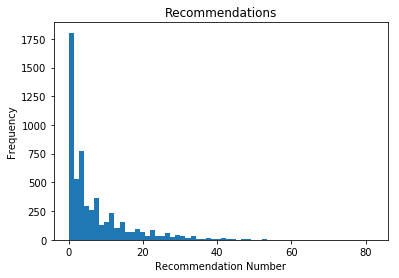

In [65]:
import matplotlib.pyplot as plt
plt.hist(index_match , bins=60)
plt.title("Recommendations")
plt.xlabel("Recommendation Number")
plt.ylabel("Frequency")
plt.show()

#TO-DO 

1. Run different algorithms to evaluate performance / quality of recommendations ? 
2. Finalize algorithm & have ability to give recommendations by 
3. Create a web app where files can be given as input for recommendations / training 
4. Tech Support going forward to stabilize the system. Health monitoring to see the health of the system. Useful when errors occur. Give state of the system. 
5. Skills based recommendation --> Alec. Would need to find ways to handle cold start problem. 
6. Try ensemble model & deep learning techniques. 
7. Score Metric for team lead to recognize quality of recommendation. 
8. Risk : 
        - System needs to be updated if data format changes. Need to ensure the format is not changed moving forward. 
9. How would you predictions be impacted if a new unseen word comes in. e.g : Aazim
10. Need to handle cold start & cross trainng 

In [130]:
help(plt.bar)

Help on function bar in module matplotlib.pyplot:

bar(left, height, width=0.8, bottom=None, hold=None, data=None, **kwargs)
    Make a bar plot.
    
    Make a bar plot with rectangles bounded by:
    
      `left`, `left` + `width`, `bottom`, `bottom` + `height`
            (left, right, bottom and top edges)
    
    Parameters
    ----------
    left : sequence of scalars
        the x coordinates of the left sides of the bars
    
    height : sequence of scalars
        the heights of the bars
    
    width : scalar or array-like, optional
        the width(s) of the bars
        default: 0.8
    
    bottom : scalar or array-like, optional
        the y coordinate(s) of the bars
        default: None
    
    color : scalar or array-like, optional
        the colors of the bar faces
    
    edgecolor : scalar or array-like, optional
        the colors of the bar edges
    
    linewidth : scalar or array-like, optional
        width of bar edge(s). If None, use default
      

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning:

No labelled objects found. Use label='...' kwarg on individual plots.



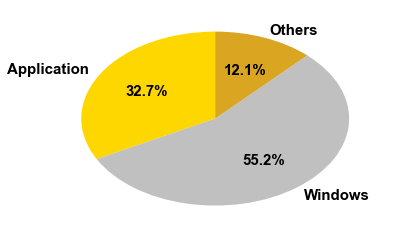

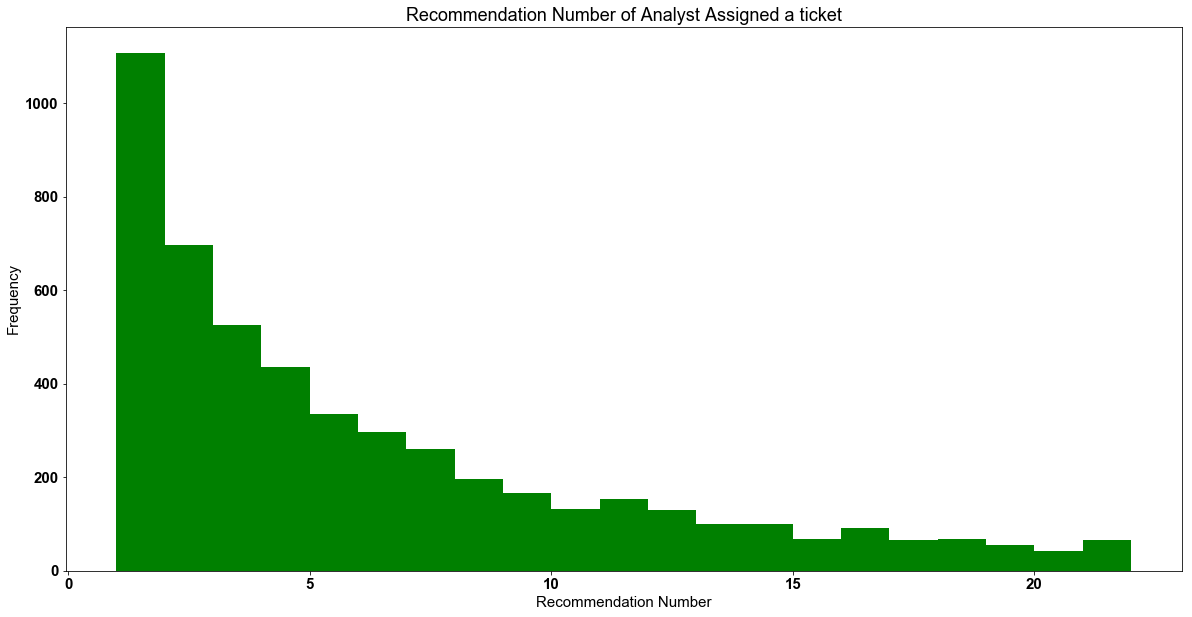

In [144]:
from collections import Counter
myDictionary = dict(Counter(index_match))
myDict = {}
for key in myDictionary.keys():
    if key <= 20 : 
        myDict[key + 1] = myDictionary[key]
myDict
#list(myDictionary.keys())
plt.figure(figsize=(20, 10))
plt.bar(list(myDict.keys()), myDict.values(), 1, color='g' , align='edge')
plt.legend()
plt.xlabel('Recommendation Number')
plt.ylabel('Frequency')

plt.title('Recommendation Number of Analyst Assigned a ticket')
plt.savefig('../docs/Evaluate_Recommendations.jpg')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning:

No labelled objects found. Use label='...' kwarg on individual plots.



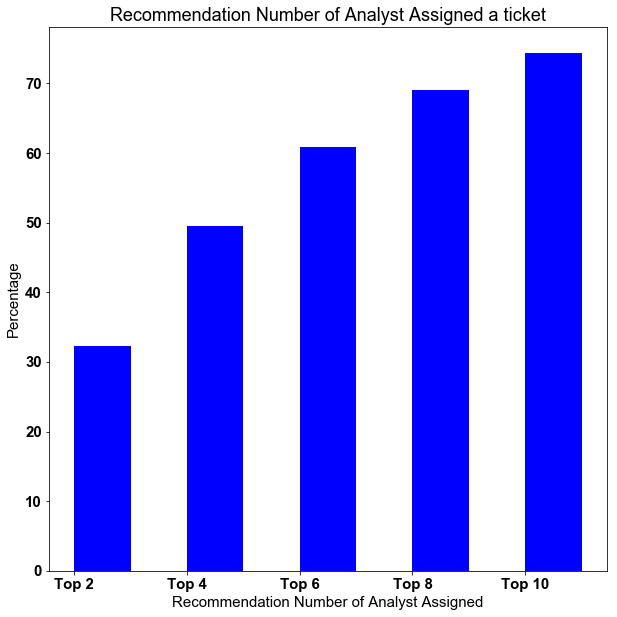

In [146]:
#myDictionary

labels_1 = [2 , 4 , 6 , 8 , 10]
count_1 = [1803 , 2765 , 3396 , 3853 , 4151 ]
count_2 = [round((c / 5582) * 100 , 2) for c in count_1]
count_2

plt.figure(figsize=(10, 10))
plt.bar(labels_1 , count_2, 1, color='b' , align='edge')
plt.legend()
plt.xlabel('Recommendation Number of Analyst Assigned')
plt.xticks(labels_1, ['Top 2' , 'Top 4' , 'Top 6' , 'Top 8' , 'Top 10'])
plt.ylabel('Percentage')


plt.title('Recommendation Number of Analyst Assigned a ticket')
plt.savefig('../docs/Evaluate_Recommendations_1.jpg')
plt.show()

<class 'collections.Counter'>


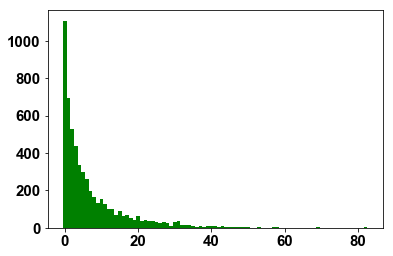

In [99]:
from collections import Counter

print(type(Counter(index_match)))
myDictionary = dict(Counter(index_match))
plt.bar(list(myDictionary.keys()), myDictionary.values(), 1, color='g')
plt.show()
# myDictionary.keys()
# myDictionary.values()

In [100]:
from collections import Counter

list(myDictionary.keys())
# myDictionary.keys()
# myDictionary.values()

[5,
 0,
 19,
 4,
 2,
 35,
 34,
 3,
 8,
 20,
 12,
 7,
 26,
 1,
 13,
 10,
 6,
 14,
 9,
 23,
 11,
 47,
 32,
 15,
 22,
 16,
 28,
 18,
 43,
 39,
 17,
 21,
 33,
 30,
 41,
 37,
 27,
 31,
 24,
 25,
 38,
 44,
 42,
 69,
 74,
 40,
 48,
 29,
 57,
 46,
 66,
 53,
 49,
 61,
 45,
 82,
 36,
 51,
 56,
 67,
 60,
 50,
 52,
 54,
 58,
 78]

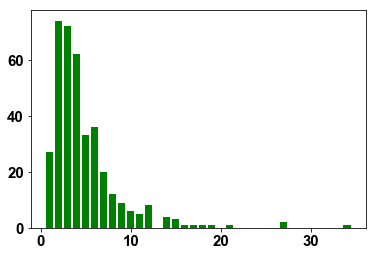

In [97]:
import matplotlib.pyplot as plt

dictionary = {1: 27, 34: 1, 3: 72, 4: 62, 5: 33, 6: 36, 7: 20, 8: 12, 9: 9, 10: 6, 11: 5, 
              12: 8, 2: 74, 14: 4, 15: 3, 16: 1, 17: 1, 18: 1, 19: 1, 21: 1, 27: 2}
plt.bar(list(dictionary.keys()), dictionary.values(), color='g')
plt.show()

In [92]:
counter_1 = Counter(index_match)
labels, values = zip(*counter_1.items())
temp_2 = counter_1.items()
temp_2.sort()
# print(labels)
# print(values)
# for i in range(20):
    
# counter_1.get(2)
# plt.bar(counter_1.keys(), counter_1.values()  , 0.5)
# #plt.xticks(indexes + width * 0.5, labels)
# plt.show()


AttributeError: 'dict_items' object has no attribute 'sort'

In [69]:
len(index_match)

5582

In [70]:
len(sorted_label_prob)

5582

In [71]:
sorted_label_prob[1]

[(534728654, 0.28109944562412276),
 (324635259, 0.14767433353145873),
 (318801727, 0.14068817444955617),
 (668401755, 0.08814202570205433),
 (178412342, 0.030803680486127808),
 (329338909, 0.029290789688687112),
 (322930777, 0.019744735587039812),
 (648708485, 0.019554511145439459),
 (324739655, 0.019125399770613796),
 (956519110, 0.018814399044969198),
 (535567176, 0.017336333830982383),
 (184831246, 0.014638259734196014),
 (859929358, 0.013423130276338444),
 (291180362, 0.012173272136768248),
 (325942654, 0.011451240804938636),
 (191918473, 0.011136636252659276),
 (936531946, 0.010292211934070372),
 (631444387, 0.010064036159725384),
 (322888413, 0.0087324391716096118),
 (522079805, 0.0077387634926391387),
 (322853433, 0.0072875159716982224),
 (859929192, 0.0067851007799037792),
 (528435936, 0.0067377920213413846),
 (322143223, 0.0067304549930836894),
 (326291085, 0.0060902746238235507),
 (180190019, 0.0059938684232822064),
 (319051371, 0.0055657156223144592),
 (535902738, 0.00522379

In [72]:
Y_test

179622    315467852
367615    329338909
7500      534728654
23692     534728654
164769    859929192
374906    544269145
81799     319749875
152288    191918473
421006    330086414
272546    327004545
146801    319749875
327236    328453238
172947    631444387
162397    178412342
353315    787489756
346209    535506877
280213    291180362
364987    324653500
238031    631444387
414230    184831246
334564    698544350
59177     322853433
27831     787489756
177170    178412342
82898     324635259
327376    668401755
394312    329808695
22922     191458827
197153    184831246
134156    859929358
            ...    
352455    329338909
276930    296472020
381200    328874185
166094    859929192
380117    648708485
234557    184831246
23936     318801727
255674    184831246
301823    668401755
154381    312363658
40690     315073148
253353    319051371
190748    312363658
216938    291180362
367832    178412342
49148     319749875
89495     315073148
234474    178412342
40054     859929358


In [73]:
X_test.indices

array([332, 290, 539, ..., 250, 135,  40], dtype=int32)

In [74]:
data.loc[367615 , :]

cat_item       User Logon ID and Personal Mailbox
Assigned_To                             329338909
Name: 367615, dtype: object

In [75]:

ticket = merged_data_assigned_tickets_with_cat_item.loc[179622 , :]


In [76]:
merged_data_assigned_tickets_with_cat_item

,RITM_Number,opened_at,state,closed_at,u_interaction_id,cat_item,Assigned_Dept_x,Number,RBC_Description,Assigned_To,Submit Date,Assigned_Dept_y,Close Date,RBC_Line_Item_Title,_merge
3,RITM0507228,2017/01/02 5:51,Closed Complete,2017/01/04 11:57,SD09972560,Service Manager 9 - User Access,EAA_APPLICATION SERVICES_IMPL,Q01423637-001,Add - Service Manager 9 - User Access\r\n\r\nT...,195808886,2001/02/17 7:05,EAA_APPLICATION SERVICES_IMPL,2001/04/17 11:37,Add - Service Manager 9 - User Access,both
4,RITM0507231,2017/01/02 6:00,Closed Complete,2017/01/04 17:34,SD09972577,Add User to Group,EAA_WINDOWS SERVICES_IMPL,Q01423652-001,Modify User - Add User to Group\r\nTHE REQUEST...,190899732,2001/02/17 7:10,EAA_WINDOWS SERVICES_IMPL,2001/04/17 17:18,* ESC - Jan 4 - SEe updates - Modify User - A...,both
5,RITM0507232,2017/01/02 6:00,Closed Complete,2017/01/04 17:38,SD09972583,Add User to Group,EAA_WINDOWS SERVICES_IMPL,Q01423657-001,Modify User - Add User to Group\r\nTHE REQUEST...,190899732,2001/02/17 7:12,EAA_WINDOWS SERVICES_IMPL,2001/04/17 17:22,* ESC - Jan 4 - See updates - Modify User - Ad...,both
6,RITM0507233,2017/01/02 6:00,Closed Complete,2017/01/04 17:33,SD09972575,Add User to Group,EAA_WINDOWS SERVICES_IMPL,Q01423650-001,Modify User - Add User to Group\r\nTHE REQUEST...,190899732,2001/02/17 7:10,EAA_WINDOWS SERVICES_IMPL,2001/04/17 17:14,* ESC - Jan 4 - See updates - Modify User - Ad...,both
7,RITM0507242,2017/01/02 7:10,Closed Complete,2017/01/04 11:56,SD09976085,Service Manager 9 - User Access,EAA_APPLICATION SERVICES_IMPL,Q01425257-001,Add - Service Manager 9 - User Access\r\n\r\nT...,195808886,2001/03/17 8:15,EAA_APPLICATION SERVICES_IMPL,2001/04/17 11:41,Add - Service Manager 9 - User Access,both
8,RITM0507243,2017/01/02 7:16,Closed Complete,2017/01/02 19:46,SD09973728,User Logon ID and Personal Mailbox,EAA_WINDOWS SERVICES_IMPL,Q01424069-001,ADD-P\r\nThe Windows ID 323557348 was created ...,936531946,2001/02/17 19:55,EAA_WINDOWS SERVICES_IMPL,2001/04/17 13:43,ADD-P,both
9,RITM0507247,2017/01/02 7:30,Closed Complete,2017/01/02 19:45,SD09973727,User Logon ID and Personal Mailbox,EAA_WINDOWS SERVICES_IMPL,Q01424068-001,"ADD-P\r\nAutomation for Windows ID failed, man...",936531946,2001/02/17 19:55,EAA_WINDOWS SERVICES_IMPL,2001/04/17 13:41,ADD-P,both
11,RITM0507272,2017/01/02 8:49,Closed Complete,2017/01/03 9:36,SD09973535,Create New Shared / Generic Mailbox,EAA_WINDOWS SERVICES_IMPL,Q01424036-001,Generic Mailbox - Create\r\nTHE REQUEST HAS BE...,535567176,2001/02/17 16:00,EAA_WINDOWS SERVICES_IMPL,2001/03/17 9:18,*ESC 03/01 Generic Mailbox - Create,both
12,RITM0507272,2017/01/02 8:49,Closed Complete,2017/01/03 9:36,SD09973535,Create New Shared / Generic Mailbox,EAA_WINDOWS SERVICES_IMPL,Q01424036-002,Generic Mailbox - Create\r\nTHE REQUEST HAS BE...,535567176,2001/09/17 14:22,EAA_WINDOWS SERVICES_IMPL,2001/09/17 14:27,Generic Mailbox - Create,both
13,RITM0507278,2017/01/02 9:21,Closed Complete,2017/01/04 10:47,SD09973326,Service Manager 9 - Assignment Groups - Add/Re...,EAA_APPLICATION SERVICES_IMPL,Q01424002-001,Add - Service Manager 9 - Assignment Groups - ...,195808886,2001/02/17 12:27,EAA_APPLICATION SERVICES_IMPL,2001/04/17 10:26,Add - Service Manager 9 - Assignment Groups - ...,both


1. Use Y_test to get the index. 
2. Find the row from dataframe named 'merged_data_assigned_tickets_with_cat_item' to get the ticket details. 
    - Create a series from each row. 
3. Add 4 columns for the recommendations & 
4. Merge the data & recommendations dataframe by index. 
5. 

In [77]:


# import pandas as pd

# r = pd.Series()
# for i in range(0, 10):
#     r = r.set_value(i,i*3)
# r.name = 'rrr'

# s = pd.Series()
# for i in range(0, 10):
#     s = s.set_value(i,i*5)
# s.name = 'sss'

In [78]:
Y_test.index

Int64Index([179622, 367615,   7500,  23692, 164769, 374906,  81799, 152288,
            421006, 272546,
            ...
            278225,  63740, 242848,  28698, 299806, 365810,  38616, 425276,
            303553,  60931],
           dtype='int64', length=5582)

In [79]:
merged_data_assigned_tickets_with_cat_item.loc[425382, :]

RITM_Number                                                  RITM2084465
opened_at                                                2018/05/16 9:13
state                                                    Closed Complete
closed_at                                               2018/05/16 12:14
u_interaction_id                                              SD16581512
cat_item                             Application - Password Reset/Unlock
Assigned_Dept_x                            EAA_APPLICATION SERVICES_IMPL
Number                                                     Q02470154-001
RBC_Description        Password Unlock - Berton - patboh\r\n\r\nTHE R...
Assigned_To                                                    191458827
Submit Date                                            05/16/18 09:14:16
Assigned_Dept_y                            EAA_APPLICATION SERVICES_IMPL
Close Date                                             05/16/18 10:06:13
RBC_Line_Item_Title                    Password Unl

In [80]:
tickets_recd_recommendation_df = merged_data_assigned_tickets_with_cat_item.loc[Y_test.index].copy()
tickets_recd_recommendation_df_1 = tickets_recd_recommendation_df.copy()
tickets_recd_recommendation_df_1

,RITM_Number,opened_at,state,closed_at,u_interaction_id,cat_item,Assigned_Dept_x,Number,RBC_Description,Assigned_To,Submit Date,Assigned_Dept_y,Close Date,RBC_Line_Item_Title,_merge
179622,RITM1148975,2017/08/29 12:09,Closed Complete,2017/09/27 15:25,SD13071065,Milvus / ISERIES,EAA_APPLICATION SERVICES_IMPL,Q01906654-001,RBCIS - Add - Milvus / ISERIES\r\n\r\nTHE REQU...,315467852,08/29/17 12:19:17,EAA_APPLICATION SERVICES_IMPL,09/27/17 08:36:05,09/20 - PC - RBCIS - Add - Milvus / ISERIES,both
367615,RITM1873238,2018/03/28 9:57,Closed Complete,2018/03/28 10:30,SD15985691,User Logon ID and Personal Mailbox,EAA_WINDOWS SERVICES_IMPL,Q02355475-001,User Logon ID and Personal Mailbox\r\nTHE REQU...,329338909,03/28/18 10:32:47,EAA_WINDOWS SERVICES_IMPL,2004/04/18 11:31,04/04 - PC GOLD User Logon ID and Personal Mai...,both
7500,RITM0530770,2017/01/13 10:19,Closed Complete,2017/01/13 11:47,SD10126906,User Logon ID and Personal Mailbox,EAA_WINDOWS SERVICES_IMPL,Q01449175-001,ADD-P\r\nThe Windows ID chasingh was created s...,534728654,01/13/17 11:56:45,EAA_WINDOWS SERVICES_IMPL,01/16/17 10:51:35,ADD-P,both
23692,RITM0583049,2017/02/09 10:45,Closed Complete,2017/02/09 11:12,SD10473184,User Logon ID and Personal Mailbox,EAA_WINDOWS SERVICES_IMPL,Q01500886-001,ADD-P\r\nThe Windows ID 324001601 was created ...,534728654,2002/09/17 11:23,EAA_WINDOWS SERVICES_IMPL,2002/10/17 13:42,ADD-P,both
164769,RITM1094033,2017/08/10 16:14,Closed Complete,2017/08/15 20:23,SD12833487,IA Code/Branch Access Add/Remove,EAA_APPLICATION SERVICES_IMPL,Q01862440-001,IA Code/Branch Access - Add - BTS\r\n\r\nTHE R...,859929192,2008/10/17 16:17,EAA_APPLICATION SERVICES_IMPL,2008/11/17 8:14,IA Code/Branch Access - Add - BTS,both
374906,RITM1897377,2018/04/04 18:23,Closed Complete,2018/04/12 10:37,SD15947236,Personal Drive Access,EAA_WINDOWS SERVICES_IMPL,Q02370217-001,Create - Personal Drive Access\r\nTHE REQUEST ...,544269145,2004/05/18 7:32,EAA_WINDOWS SERVICES_IMPL,2004/12/18 7:32,Create - Personal Drive Access,both
81799,RITM0784185,2017/05/01 12:56,Closed Complete,2017/05/04 19:36,SD11501508,IA Code/Branch Access Add/Remove,EAA_APPLICATION SERVICES_IMPL,Q01658316-001,IA Code/Branch Access - Add - JEFE\r\n\r\nTHE ...,319749875,2005/01/17 15:35,EAA_APPLICATION SERVICES_IMPL,2005/04/17 15:48,IA Code/Branch Access - Add - JEFE,both
152288,RITM1044588,2017/07/26 10:56,Closed Complete,2017/07/28 14:01,SD12625471,Modify Generic ID - Add Workstation Lockdown,EAA_WINDOWS SERVICES_IMPL,Q01827180-001,Modify Generic ID - Add Workstation Lockdown\r...,191918473,07/26/17 11:00:28,EAA_WINDOWS SERVICES_IMPL,07/28/17 13:13:09,Modify Generic ID - Add Workstation Lockdown,both
421006,RITM2070450,2018/05/13 9:11,Closed Complete,2018/05/16 16:20,SD16535534,Create Application Group,EAA_WINDOWS SERVICES_IMPL,Q02460971-001,Create Application Group\r\nTHE REQUEST HAS BE...,330086414,05/13/18 09:19:00,EAA_WINDOWS SERVICES_IMPL,05/16/18 13:56:21,18/05 PA - Create Application Group,both
272546,RITM1510954,2017/12/14 17:18,Closed Complete,2018/01/18 21:27,SD14482176,Generic Mailbox - Enable/Disable for Large Dis...,EAA_WINDOWS SERVICES_IMPL,Q02136093-001,Generic Mailbox - Enable/Disable for Large Dis...,327004545,12/14/17 17:22:41,EAA_WINDOWS SERVICES_IMPL,01/18/18 14:25:05,Generic Mailbox - Enable/Disable for Large Dis...,both


In [81]:
# r1 , r2 , r3 , r4 = [l[0][0] , l[1][0] , l[2][0] , l[3][0]  for l in sorted_label_prob[0:2]]
# print(r1)
# print(r2)
r1 , r2 , r3 , r4 = [] , [] , [] ,[]
for l in sorted_label_prob:
    r1.append(l[0][0])
    r2.append(l[1][0])
    r3.append(l[2][0])
    r4.append(l[3][0])

R1 = pd.Series(r1 , index=tickets_recd_recommendation_df.index)    
R2 = pd.Series(r2 , index=tickets_recd_recommendation_df.index)    
R3 = pd.Series(r3 , index=tickets_recd_recommendation_df.index)    
R4 = pd.Series(r4 , index=tickets_recd_recommendation_df.index)  

tickets_recd_recommendation_df_1['R1'] = R1
tickets_recd_recommendation_df_1['R2'] = R2
tickets_recd_recommendation_df_1['R3'] = R3
tickets_recd_recommendation_df_1['R4'] = R4 

tickets_recd_recommendation_df_1.head()
#tickets_recd_recommendation_df.index
# print(r1)
# print(r2)

,RITM_Number,opened_at,state,closed_at,u_interaction_id,cat_item,Assigned_Dept_x,Number,RBC_Description,Assigned_To,Submit Date,Assigned_Dept_y,Close Date,RBC_Line_Item_Title,_merge,R1,R2,R3,R4
179622,RITM1148975,2017/08/29 12:09,Closed Complete,2017/09/27 15:25,SD13071065,Milvus / ISERIES,EAA_APPLICATION SERVICES_IMPL,Q01906654-001,RBCIS - Add - Milvus / ISERIES\r\n\r\nTHE REQU...,315467852,08/29/17 12:19:17,EAA_APPLICATION SERVICES_IMPL,09/27/17 08:36:05,09/20 - PC - RBCIS - Add - Milvus / ISERIES,both,180190019,631444387,178412342,936531946
367615,RITM1873238,2018/03/28 9:57,Closed Complete,2018/03/28 10:30,SD15985691,User Logon ID and Personal Mailbox,EAA_WINDOWS SERVICES_IMPL,Q02355475-001,User Logon ID and Personal Mailbox\r\nTHE REQU...,329338909,03/28/18 10:32:47,EAA_WINDOWS SERVICES_IMPL,2004/04/18 11:31,04/04 - PC GOLD User Logon ID and Personal Mai...,both,534728654,324635259,318801727,668401755
7500,RITM0530770,2017/01/13 10:19,Closed Complete,2017/01/13 11:47,SD10126906,User Logon ID and Personal Mailbox,EAA_WINDOWS SERVICES_IMPL,Q01449175-001,ADD-P\r\nThe Windows ID chasingh was created s...,534728654,01/13/17 11:56:45,EAA_WINDOWS SERVICES_IMPL,01/16/17 10:51:35,ADD-P,both,534728654,324635259,318801727,668401755
23692,RITM0583049,2017/02/09 10:45,Closed Complete,2017/02/09 11:12,SD10473184,User Logon ID and Personal Mailbox,EAA_WINDOWS SERVICES_IMPL,Q01500886-001,ADD-P\r\nThe Windows ID 324001601 was created ...,534728654,2002/09/17 11:23,EAA_WINDOWS SERVICES_IMPL,2002/10/17 13:42,ADD-P,both,534728654,324635259,318801727,668401755
164769,RITM1094033,2017/08/10 16:14,Closed Complete,2017/08/15 20:23,SD12833487,IA Code/Branch Access Add/Remove,EAA_APPLICATION SERVICES_IMPL,Q01862440-001,IA Code/Branch Access - Add - BTS\r\n\r\nTHE R...,859929192,2008/10/17 16:17,EAA_APPLICATION SERVICES_IMPL,2008/11/17 8:14,IA Code/Branch Access - Add - BTS,both,315073148,319574810,319749875,328453238


In [82]:
tickets_recd_recommendation_df_1.to_csv(path_or_buf= os.environ['PROJECT_DIR'] + "\\datasets\\tickets_recd_recommendation.csv" , encoding="Latin-1" , index = False)

In [217]:
sm9_data_without_RITM.head()

,Number,RBC_Description,Assigned_To,Submit Date,RITM_Number,Assigned_Dept,Close Date,RBC_Line_Item_Title
0,Q01654864-001,A termination request has recently been submit...,535506877,2005/01/17 6:51,NaN,EAA_APPLICATION SERVICES_IMPL,2004/02/18 11:47,A termination request has recently been submit...
1,Q01655290-001,A termination request has recently been submit...,310294822,2005/01/17 7:45,NaN,EAA_APPLICATION SERVICES_IMPL,2004/02/18 13:54,A termination request has recently been submit...
2,Q02211785-001,04/14 - RBCIS term Frédéric ERBETTI - 52333504...,631444387,01/26/18 08:00:22,NaN,EAA_APPLICATION SERVICES_IMPL,04/16/18 10:37:01,04/14 - RBCIS term Frédéric ERBETTI - 523335040
3,Q02244759-001,RBCIS - BEDFORD - EXIT Arnaud COURTOIS April ...,180190019,2002/09/18 9:32,NaN,EAA_APPLICATION SERVICES_IMPL,04/17/18 09:58:56,04/15 PD RBCIS - BEDFORD - EXIT Arnaud COURTO...
4,Q02264742-001,ESAM HR TERMINATION - SM9\r\nSUBMITTER LOGON I...,324653500,02/16/18 21:15:44,NaN,EAA_APPLICATION SERVICES_IMPL,2004/02/18 19:37,ESAM HR TERMINATION - SM9


In [220]:
sm9_data_without_RITM_min = sm9_data_without_RITM[['RBC_Description' , 'Assigned_To', 'RBC_Line_Item_Title' ]]
sm9_data_without_RITM_min.head()

,RBC_Description,Assigned_To,RBC_Line_Item_Title
0,A termination request has recently been submit...,535506877,A termination request has recently been submit...
1,A termination request has recently been submit...,310294822,A termination request has recently been submit...
2,04/14 - RBCIS term Frédéric ERBETTI - 52333504...,631444387,04/14 - RBCIS term Frédéric ERBETTI - 523335040
3,RBCIS - BEDFORD - EXIT Arnaud COURTOIS April ...,180190019,04/15 PD RBCIS - BEDFORD - EXIT Arnaud COURTO...
4,ESAM HR TERMINATION - SM9\r\nSUBMITTER LOGON I...,324653500,ESAM HR TERMINATION - SM9


In [218]:
merged_data_assigned_tickets_without_cat_item.head()

,RITM_Number,opened_at,state,closed_at,u_interaction_id,cat_item,Assigned_Dept_x,Number,RBC_Description,Assigned_To,Submit Date,Assigned_Dept_y,Close Date,RBC_Line_Item_Title,_merge
425383,RITM1732565,NaN,NaN,NaN,NaN,NaN,NaN,Q02268854-002,PLEASE REMOVE THE FOLLOWING ACCESS\r\n\r\nUser...,310294822,2003/07/18 13:17,EAA_APPLICATION SERVICES_IMPL,04/13/18 13:36:03,* 03/13 PO - RTP -AACG REMOVAL FICC RTTM,right_only
425384,RITM1789456,NaN,NaN,NaN,NaN,NaN,NaN,Q02303786-002,"Hi Team,\r\n\r\nPlease amend the below access ...",310294822,2003/07/18 11:25,EAA_APPLICATION SERVICES_IMPL,2004/03/18 11:31,03/13 PO - RTP AACG - Application Access Reque...,right_only
425385,RITM1815225,NaN,NaN,NaN,NaN,NaN,NaN,Q02321589-002,CMACS-12530 - Q02321589-001 - SWIFT Messaging ...,310294822,03/15/18 07:44:33,EAA_APPLICATION SERVICES_IMPL,2004/03/18 14:37,04/03 PO - RTP - AACG - SWIFT Messaging Platfo...,right_only
425386,RITM1829380,NaN,NaN,NaN,NaN,NaN,NaN,Q02328981-002,CMACS-12683 - Q02328981-001 - SWIFT Messaging ...,310294822,03/22/18 13:00:56,EAA_APPLICATION SERVICES_IMPL,2004/02/18 12:39,03/29 PO - RTP - AACG - SWIFT Messaging Platfo...,right_only
425387,RITM1846508,NaN,NaN,NaN,NaN,NaN,NaN,Q02337904-002,CMACS-12813 - Q02337904-001 - SWIFT Messaging ...,310294822,03/22/18 13:17:46,EAA_APPLICATION SERVICES_IMPL,2004/02/18 12:37,03/29 PO - RTP - AACG - SWIFT Messaging Platfo...,right_only


In [222]:
#merged_data_assigned_tickets_without_cat_item['_merge'].value_counts()
merged_data_assigned_tickets_without_cat_item_min = merged_data_assigned_tickets_without_cat_item[['RBC_Description','Assigned_To','RBC_Line_Item_Title']]
merged_data_assigned_tickets_without_cat_item_min.head()

,RBC_Description,Assigned_To,RBC_Line_Item_Title
425383,PLEASE REMOVE THE FOLLOWING ACCESS\r\n\r\nUser...,310294822,* 03/13 PO - RTP -AACG REMOVAL FICC RTTM
425384,"Hi Team,\r\n\r\nPlease amend the below access ...",310294822,03/13 PO - RTP AACG - Application Access Reque...
425385,CMACS-12530 - Q02321589-001 - SWIFT Messaging ...,310294822,04/03 PO - RTP - AACG - SWIFT Messaging Platfo...
425386,CMACS-12683 - Q02328981-001 - SWIFT Messaging ...,310294822,03/29 PO - RTP - AACG - SWIFT Messaging Platfo...
425387,CMACS-12813 - Q02337904-001 - SWIFT Messaging ...,310294822,03/29 PO - RTP - AACG - SWIFT Messaging Platfo...


# Working on tickets that don't have cat_item 

In [223]:
# How to display entire string in jupyter notebook
# Retriving info from sparse matrix to be able to explain our decisions ? Are there alternative approaches ? 
# 

tickets_without_cat_item = pd.concat([sm9_data_without_RITM_min,merged_data_assigned_tickets_without_cat_item_min])


33461 14056


47517

In [226]:
print(len(sm9_data_without_RITM_min) , len(merged_data_assigned_tickets_without_cat_item_min))
print(len(tickets_without_cat_item))
print(len(merged_data_assigned_tickets_with_cat_item))
tickets_without_cat_item.to_csv(path_or_buf= os.environ['PROJECT_DIR'] + "\\datasets\\tickets_without_cat_item.csv" , encoding="Latin-1" , index = False)


33461 14056
47517


In [240]:
rbc_title_is_null = tickets_without_cat_item.loc[tickets_without_cat_item['RBC_Line_Item_Title'].isnull()]
rbc_title_is_null

,RBC_Description,Assigned_To,RBC_Line_Item_Title
5646,SUBMITTER LOGON INFORMATION\r\nFirst Name: Ann...,319463568,NaN
5747,SUBMITTER LOGON INFORMATION\r\nFirst Name: Ann...,319463568,NaN
4834,A termination request has recently been submit...,698544350,NaN
7303,SUBMITTER LOGON INFORMATION\r\nFirst Name: Ann...,698544350,NaN
6454,SUBMITTER LOGON INFORMATION\r\nFirst Name: And...,956519110,NaN
9035,SUBMITTER LOGON INFORMATION\r\nFirst Name: Men...,180190019,NaN


In [236]:
# For the below tickets RBC Line Item Title column was null . Hence setting its value to that of RBC Description. 
rbc_title_is_null['RBC_Line_Item_Title'] = rbc_title_is_null['RBC_Description']
rbc_title_is_null

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,RBC_Description,Assigned_To,RBC_Line_Item_Title
5646,SUBMITTER LOGON INFORMATION\r\nFirst Name: Ann...,319463568,SUBMITTER LOGON INFORMATION\r\nFirst Name: Ann...
5747,SUBMITTER LOGON INFORMATION\r\nFirst Name: Ann...,319463568,SUBMITTER LOGON INFORMATION\r\nFirst Name: Ann...
4834,A termination request has recently been submit...,698544350,A termination request has recently been submit...
7303,SUBMITTER LOGON INFORMATION\r\nFirst Name: Ann...,698544350,SUBMITTER LOGON INFORMATION\r\nFirst Name: Ann...
6454,SUBMITTER LOGON INFORMATION\r\nFirst Name: And...,956519110,SUBMITTER LOGON INFORMATION\r\nFirst Name: And...
9035,SUBMITTER LOGON INFORMATION\r\nFirst Name: Men...,180190019,SUBMITTER LOGON INFORMATION\r\nFirst Name: Men...


In [239]:
 tickets_without_cat_item['RBC_Line_Item_Title'].fillna(tickets_without_cat_item['RBC_Description'])

0         A termination request has recently been submit...
1         A termination request has recently been submit...
2           04/14 - RBCIS term Frédéric ERBETTI - 523335040
3         04/15 PD  RBCIS - BEDFORD - EXIT Arnaud COURTO...
4                                 ESAM HR TERMINATION - SM9
6         04/01 PD  RBCIS - BEDFORD  Termination - EXIT ...
7         An access review has recently been completed b...
8         04/01 PD RBCIS - BEDFORD Termination - EXIT G....
9         04/01 PD  RBCIS - BEDFORD Termination - EXIT N...
10        04/01 PD  RBCIS - Bedford - Termination EXIT G...
11                04/09 - PC ISERIES USER ENROLMENT REQUEST
14          AAA REGISTERED REPRESENTATIVE FILE LIST REQUEST
22                                     HR Termination - SM9
25                                 * 04/26 PD - Comp Hire-2
26                       04/26 PD - SEE UPDATES (Comp Hire)
39        A termination request has recently been submit...
57        * ESC 03/27 PO - see updates -

In [234]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect_1 = CountVectorizer()
X_1 = count_vect_1.fit_transform(tickets_without_cat_item['RBC_Line_Item_Title'])
#count_vect_1.get_feature_names()
X_1.shape

ValueError: np.nan is an invalid document, expected byte or unicode string.